In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

In [2]:
# pliki z mapami
wojewodztwa = gpd.read_file('../map_data/wojewodztwa.shp')
wojewodztwa.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,...,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,...,32,None,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22608 53.92774, 14.22633 53.92864..."
4,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."


In [3]:
wojewodztwa_map_data = wojewodztwa[['JPT_KOD_JE', "geometry"]]
wojewodztwa_map_data.head()

,JPT_KOD_JE,geometry
0,24,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,16,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,30,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,32,"POLYGON ((14.22608 53.92774, 14.22633 53.92864..."
4,26,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."


In [4]:
gminy_map_data = gpd.read_file('../map_data/gminy.shp')[['JPT_KOD_JE', 'geometry']]
gminy_map_data.head()

,JPT_KOD_JE,geometry
0,1203022,"POLYGON ((19.43443 50.02313, 19.43409 50.02316..."
1,1204042,"POLYGON ((20.92531 50.24308, 20.92531 50.24308..."
2,2010082,"POLYGON ((22.60796 52.51705, 22.60798 52.51711..."
3,0222033,"POLYGON ((16.49835 51.22612, 16.49692 51.22615..."
4,0223022,"POLYGON ((17.24961 51.10001, 17.24918 51.10003..."


In [5]:
dane = pd.read_csv("Ludnosc_wg_TERYT_total_2017.csv")
dane.head()

,Kod,ludnosc
0,0,38433558
1,200000,2902547
2,201000,90173
3,201011,39084
4,201022,14391


In [6]:
# poprawienie kodów TERYT w danych z GUS

# bez całego kraju
dane_gus = dane[dane['Kod'] != 0]

# kod ma być stringiem o stałejdługości (dodanie wiodących zer)
dane_gus['TERYT_gmn'] = dane_gus.Kod.apply(lambda x: '0'+str(x) if len(str(x)) < 7 else str(x))

# TERYT powiatu
dane_gus['TERYT_pow'] = dane_gus.TERYT_gmn.apply(lambda s: s[:4])

# TERYT województwa
dane_gus['TERYT_woj'] = dane_gus.TERYT_gmn.apply(lambda s: s[:2])

# usuwamy kolumnę 'Kod' która jest już niepotrzeba
dane_gus.drop('Kod', axis=1, inplace=True)

dane_gus.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
1,2902547,0200000,0200,02
2,90173,0201000,0201,02
3,39084,0201011,0201,02
4,14391,0201022,0201,02
5,5345,0201032,0201,02


In [7]:
dane_gus.dtypes

ludnosc       int64
TERYT_gmn    object
TERYT_pow    object
TERYT_woj    object
dtype: object

In [8]:
# tylko dane na poziomie województw
# wojewodztwo to to co w powiecie TERYTu ma 00 na końcu
dane_gus_woj = dane_gus[dane_gus.TERYT_pow.str[2:4] == '00']
dane_gus_woj

,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
1,2902547,0200000,0200,02
313,2082944,0400000,0400,04
551,2126317,0600000,0600,06
843,1016832,0800000,0800,08
1006,2476315,1000000,1000,10
1260,3391380,1200000,1200,12
1559,5384617,1400000,1400,14
2036,990069,1600000,1600,16
2184,2129138,1800000,1800,18
2440,1184548,2000000,2000,20


In [9]:
dane_gus = dane_gus[dane_gus.TERYT_pow.str[2:4] != '00']

In [10]:
woj_map = pd.merge(wojewodztwa_map_data, dane_gus_woj, how='left', left_on='JPT_KOD_JE', right_on='TERYT_woj')
woj_map

,JPT_KOD_JE,geometry,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
0,24,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51...",4548180,2400000,2400,24
1,16,"POLYGON ((17.81203 51.18669, 17.81209 51.18670...",990069,1600000,1600,16
2,30,"POLYGON ((16.71447 53.29913, 16.71447 53.29920...",3489210,3000000,3000,30
3,32,"POLYGON ((14.22608 53.92774, 14.22633 53.92864...",1705533,3200000,3200,32
4,26,"POLYGON ((19.70430 50.75239, 19.70443 50.75248...",1247732,2600000,2600,26
5,04,"POLYGON ((17.65670 53.57115, 17.65672 53.57115...",2082944,0400000,0400,04
6,20,"POLYGON ((21.98108 52.97859, 21.98078 52.97861...",1184548,2000000,2000,20
7,02,"POLYGON ((15.10534 51.42730, 15.10540 51.42732...",2902547,0200000,0200,02
8,18,"POLYGON ((22.03538 50.80675, 22.03550 50.80681...",2129138,1800000,1800,18
9,12,"POLYGON ((19.97230 50.51625, 19.97227 50.51633...",3391380,1200000,1200,12


In [11]:
import folium

In [12]:
# uproszczenie geometrii - żeby kształty zajmowały mniej miejsca
woj_map.geometry = woj_map.geometry.simplify(0.002) # mniejsza wartosc = bardziej dokładnie

In [13]:
# dane do GeOJSON na potrzeby Folium
woj_geoPath = woj_map.to_json()
len(woj_geoPath)

575900

In [91]:
woj_geoPath[:1000]

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"JPT_KOD_JE": "24", "Kod": 2400000, "TERYT_gmn": "2400000", "TERYT_pow": "2400", "TERYT_woj": "24", "ludnosc": 4548180}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[18.91685459000007, 51.09608365100007], [18.923019698000076, 51.099429738000026], [18.924892099000033, 51.096756061000065], [18.932404648000045, 51.09310824100004], [18.939716689000022, 51.091204110000035], [18.945417977000034, 51.092366182000035], [18.958691656000042, 51.088970638000035], [18.961556685000062, 51.08477308800008], [18.96994810500007, 51.08063833700004], [18.978396545000066, 51.08061719600005], [18.984945365000044, 51.07740149600005], [18.993257259000075, 51.07614937200003], [19.00033897900005, 51.07079023500006], [19.011631046000048, 51.06650588200006], [19.00905818500007, 51.06033730300004], [19.012115797000035, 51.05871176100004], [19.016712446000042, 51.05186083000007], [19.045075456000063, 51.045287381000

In [14]:
%%time
mapa = folium.Map([50, 20], zoom_start=8, tiles='Stamen Toner')

mapa.choropleth(geo_data=woj_geoPath, # geojson
                data=dane_gus_woj, # data frame z danymi
                columns=['TERYT_woj', 'ludnosc'], # kolumna z kluczen, kolumna z wartościami
                key_on='feature.properties.JPT_KOD_JE', # jak nazywa się klucz w geojson
                fill_color='YlOrRd', 
                fill_opacity=0.7,
                line_opacity=0.2,
               legend_name="nazwa legendy")

mapa.save(outfile = 'wojewodztwa.html')

CPU times: user 187 ms, sys: 15 ms, total: 202 ms
Wall time: 201 ms


/usr/local/lib/python3.6/dist-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


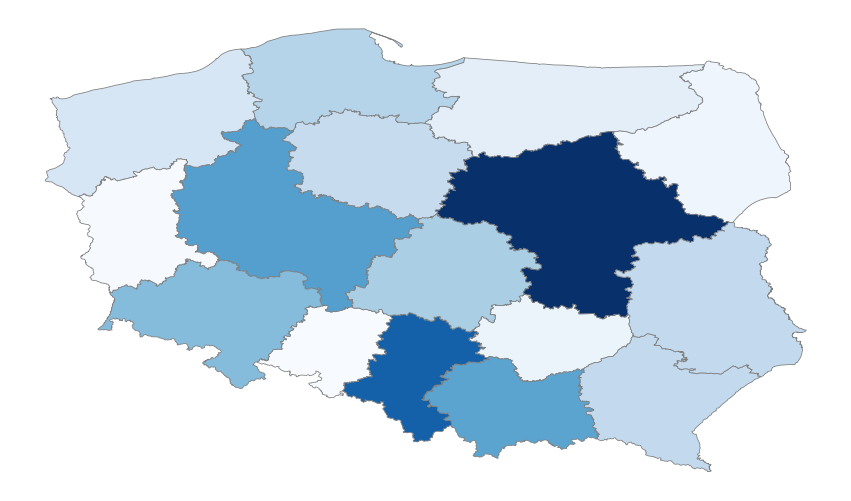

In [15]:
fig, ax = plt.subplots(1, figsize = (15,15))
woj_map.plot(column='ludnosc', ax=ax, cmap='Blues', linewidth=0.8, edgecolor='gray')
ax.axis('off')
ax.set_aspect('equal',  'box')
plt.show()

In [16]:
gmn_map = pd.merge(gminy_map_data, dane_gus, how='left', left_on='JPT_KOD_JE', right_on='TERYT_gmn')
gmn_map

,JPT_KOD_JE,geometry,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
0,1203022,"POLYGON ((19.43443 50.02313, 19.43409 50.02316...",9124.0,1203022,1203,12
1,1204042,"POLYGON ((20.92531 50.24308, 20.92531 50.24308...",3483.0,1204042,1204,12
2,2010082,"POLYGON ((22.60796 52.51705, 22.60798 52.51711...",2866.0,2010082,2010,20
3,0222033,"POLYGON ((16.49835 51.22612, 16.49692 51.22615...",22629.0,0222033,0222,02
4,0223022,"POLYGON ((17.24961 51.10001, 17.24918 51.10003...",30706.0,0223022,0223,02
...,...,...,...,...,...,...
2472,3008022,"POLYGON ((17.87083 51.21367, 17.87034 51.21369...",6093.0,3008022,3008,30
2473,3010092,"POLYGON ((18.33929 52.41244, 18.33818 52.41247...",6142.0,3010092,3010,30
2474,3012043,"POLYGON ((17.54672 51.62678, 17.54611 51.62703...",40593.0,3012043,3012,30
2475,2406032,"POLYGON ((18.76309 50.98291, 18.76306 50.98291...",6302.0,2406032,2406,24


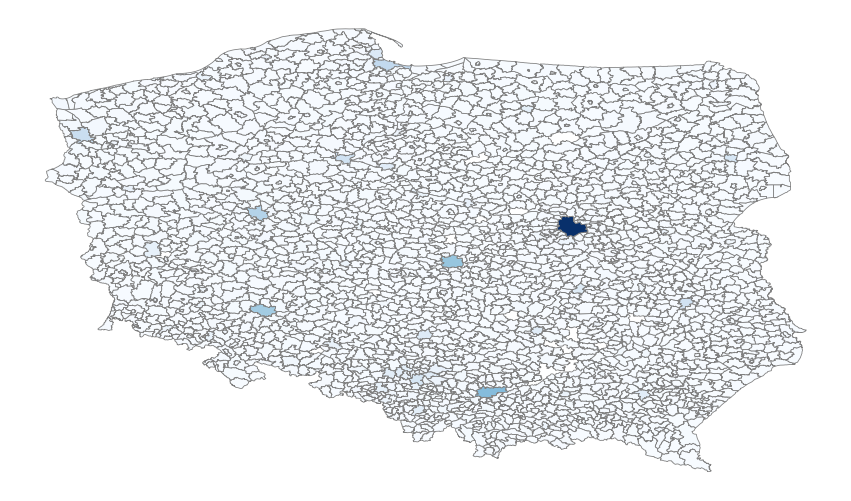

CPU times: user 9.83 s, sys: 313 ms, total: 10.1 s
Wall time: 9.88 s


In [17]:
%%time

fig, ax = plt.subplots(1, figsize = (15,15))
gmn_map.plot(column='ludnosc', ax=ax, cmap='Blues', linewidth=0.8, edgecolor='gray')
ax.axis('off')
ax.set_aspect('equal',  'box')
plt.show()

In [18]:
# uproszczenie geometrii - żeby kształty zajmowały mniej miejsca
gmn_map.geometry = gmn_map.geometry.simplify(0.005) # mniejsza wartosc = bardziej dokładnie

# dane do GeOJSON na potrzeby Folium
gmn_geoPath = gmn_map.to_json()

In [19]:
dane_gus.head()

,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
2,90173,0201000,0201,02
3,39084,0201011,0201,02
4,14391,0201022,0201,02
5,5345,0201032,0201,02
6,15290,0201043,0201,02


In [20]:
dane_gus.sort_values('ludnosc')

,ludnosc,TERYT_gmn,TERYT_pow,TERYT_woj
2759,386,2213015,2213,22
4040,448,3211035,3211,32
2580,703,2011045,2011,20
1569,896,1401064,1401,14
1747,908,1416045,1416,14
...,...,...,...,...
1255,690422,1061011,1061,10
1553,767348,1261000,1261,12
1554,767348,1261011,1261,12
2017,1764615,1465011,1465,14


In [21]:
%%time
mapa = folium.Map([50, 20], zoom_start=8)

folium.Choropleth(geo_data=gmn_geoPath, # geojson
                data=dane_gus, # data frame z danymi
                columns=['TERYT_gmn', 'ludnosc'], # kolumna z kluczen, kolumna z wartościami
                key_on='feature.properties.JPT_KOD_JE', # jak nazywa się klucz w geojson
                fill_color='YlOrRd', 
                fill_opacity=0.7,
                line_opacity=0.2,
               legend_name="Liczba mieszkańców w gminie").add_to(mapa)

mapa.save(outfile = 'gminy.html')

CPU times: user 1.42 s, sys: 59.9 ms, total: 1.48 s
Wall time: 1.48 s
